In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from olympus.datasets import Dataset
from olympus.objects import ParameterVector
import itertools
import torch

from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import os
import sys
import pickle
from glob import glob

from olympus import Surface

sns.set(style='ticks', context='notebook', font_scale=1.2)
from cmcrameri import cm


tkwargs = {'device': 'cpu', 'dtype': torch.double}

In [12]:
dset_a = Dataset(kind='buchwald_a')
dset_b = Dataset(kind='buchwald_b')
dset_c = Dataset(kind='buchwald_c')
dset_d = Dataset(kind='buchwald_d')
dset_e = Dataset(kind='buchwald_e')


In [14]:
param_names = list(dset_a.data.columns)[:-1]
print(param_names)

params_a = dset_a.data[param_names].values
params_pvec_a = []
for param in params_a:
    params_pvec_a.append(ParameterVector().from_dict(dict(zip(param_names, param)), param_space=dset_a.param_space))

    
params_b = dset_b.data[param_names].values
params_pvec_b = []
for param in params_b:
    params_pvec_b.append(ParameterVector().from_dict(dict(zip(param_names, param)), param_space=dset_a.param_space))
    
    
params_c = dset_c.data[param_names].values
params_pvec_c = []
for param in params_c:
    params_pvec_c.append(ParameterVector().from_dict(dict(zip(param_names, param)), param_space=dset_a.param_space))
    
    
params_d = dset_d.data[param_names].values
params_pvec_d = []
for param in params_d:
    params_pvec_d.append(ParameterVector().from_dict(dict(zip(param_names, param)), param_space=dset_a.param_space))

    
params_e = dset_e.data[param_names].values
params_pvec_e = []
for param in params_e:
    params_pvec_e.append(ParameterVector().from_dict(dict(zip(param_names, param)), param_space=dset_a.param_space))
  

['aryl_halide', 'additive', 'base', 'ligand']


In [19]:
obj_a = []
for param in params_pvec_a:
    obj_a.append(dset_a.run(param, noiseless=True)[0][0])
    
obj_b = []
for param in params_pvec_b:
    obj_b.append(dset_b.run(param, noiseless=True)[0][0])
    
obj_c = []
for param in params_pvec_c:
    obj_c.append(dset_c.run(param, noiseless=True)[0][0])
    
obj_d = []
for param in params_pvec_d:
    obj_d.append(dset_d.run(param, noiseless=True)[0][0])
    
obj_e = []
for param in params_pvec_e:
    obj_e.append(dset_e.run(param, noiseless=True)[0][0])

In [24]:
best_idx_a = np.argmax(obj_a)
best_obj_a = obj_a[best_idx_a]
best_param_a = params_pvec_a[best_idx_a]
print(best_idx_a)
print(best_obj_a)
print(best_param_a)


best_idx_b = np.argmax(obj_b)
best_obj_b = obj_b[best_idx_b]
best_param_b = params_pvec_b[best_idx_b]
print('\n')
print(best_idx_b)
print(best_obj_b)
print(best_param_b)

best_idx_c = np.argmax(obj_c)
best_obj_c = obj_c[best_idx_c]
best_param_c = params_pvec_c[best_idx_c]
print('\n')
print(best_idx_c)
print(best_obj_c)
print(best_param_c)

best_idx_d = np.argmax(obj_d)
best_obj_d = obj_d[best_idx_d]
best_param_d = params_pvec_d[best_idx_d]
print('\n')
print(best_idx_d)
print(best_obj_d)
print(best_param_d)

best_idx_e = np.argmax(obj_e)
best_obj_e = obj_e[best_idx_e]
best_param_e = params_pvec_e[best_idx_e]
print('\n')
print(best_idx_e)
print(best_obj_e)
print(best_param_e)

597
55.56585889
ParamVector(aryl_halide = FC(F)(F)c1ccc(I)cc1, additive = Cc1ccon1, base = CN1CCCN2CCCN=C12, ligand = CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5)C3)C67CC8CC(C7)CC(C8)C6)C(C(C)C)=CC(C(C)C)=C1)C)


740
68.2481271
ParamVector(aryl_halide = COc1ccc(I)cc1, additive = C(N(Cc1ccccc1)c2ccon2)c3ccccc3, base = CN1CCCN2CCCN=C12, ligand = CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5)C3)C67CC8CC(C7)CC(C8)C6)C(C(C)C)=CC(C(C)C)=C1)C)


276
86.59757822
ParamVector(aryl_halide = CCc1ccc(Br)cc1, additive = CCOC(=O)c1onc(C)c1, base = CN1CCCN2CCCN=C12, ligand = CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C)(C)C)C(C)(C)C)


575
99.99999
ParamVector(aryl_halide = Ic1ccccn1, additive = o1cc(cn1)c2ccccc2, base = CN1CCCN2CCCN=C12, ligand = CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C)(C)C)C(C)(C)C)


275
98.73132029
ParamVector(aryl_halide = Brc1cccnc1, additive = o1nccc1c2ccccc2, base = CN1CCCN2CCCN=C12, ligand = CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C)(C)C)C(C)(C)C)


In [25]:
best_vals = {
    'a': {'best_idx': best_idx_a, 'best_obj': best_obj_a, 'best_params': best_param_a},
    'b': {'best_idx': best_idx_b, 'best_obj': best_obj_b, 'best_params': best_param_b},
    'c': {'best_idx': best_idx_c, 'best_obj': best_obj_c, 'best_params': best_param_c},
    'd': {'best_idx': best_idx_d, 'best_obj': best_obj_d, 'best_params': best_param_d},
    'e': {'best_idx': best_idx_e, 'best_obj': best_obj_e, 'best_params': best_param_e},
}
pickle.dump(best_vals, open('best_vals_buchwald_ae.pkl', 'wb'))

### Concatenate together source tasks for buchwald_{a-e} problems

In [31]:
all_source = pickle.load(open('all_15_source_tasks/tasks_aryl_one_hot.pkl', 'rb'))

# 5 datasets, sets of 3 need to be concatenated together

idx_map = {
    'a': [0, 1, 2],
    'b': [3, 4, 5],
    'c': [6, 7, 8],
    'd': [9, 10, 11],
    'e': [12, 13, 14],
}
source_sets = list(idx_map.keys())
source_sets

['a', 'b', 'c', 'd', 'e']

In [32]:
target_set = 'a'
source_tasks_a = []
for source_set in source_sets:
    if source_set != target_set:
        source_params = np.concatenate([all_source[idx]['params'] for idx in idx_map[source_set]])
        source_values = np.concatenate([all_source[idx]['values'] for idx in idx_map[source_set]])
        print(source_params.shape, source_values.shape)
        source_tasks_a.append({'params': source_params, 'values': source_values})
        
pickle.dump(source_tasks_a, open('ae_source_tasks/source_tasks_a.pkl', 'wb'))

(828, 30) (828, 1)
(825, 30) (825, 1)
(826, 30) (826, 1)
(827, 30) (827, 1)


In [33]:
target_set = 'b'
source_tasks_b = []
for source_set in source_sets:
    if source_set != target_set:
        source_params = np.concatenate([all_source[idx]['params'] for idx in idx_map[source_set]])
        source_values = np.concatenate([all_source[idx]['values'] for idx in idx_map[source_set]])
        print(source_params.shape, source_values.shape)
        source_tasks_b.append({'params': source_params, 'values': source_values})
        
pickle.dump(source_tasks_b, open('ae_source_tasks/source_tasks_b.pkl', 'wb'))

(826, 30) (826, 1)
(825, 30) (825, 1)
(826, 30) (826, 1)
(827, 30) (827, 1)


In [34]:
target_set = 'c'
source_tasks_c = []
for source_set in source_sets:
    if source_set != target_set:
        source_params = np.concatenate([all_source[idx]['params'] for idx in idx_map[source_set]])
        source_values = np.concatenate([all_source[idx]['values'] for idx in idx_map[source_set]])
        print(source_params.shape, source_values.shape)
        source_tasks_c.append({'params': source_params, 'values': source_values})
        
pickle.dump(source_tasks_c, open('ae_source_tasks/source_tasks_c.pkl', 'wb'))

(826, 30) (826, 1)
(828, 30) (828, 1)
(826, 30) (826, 1)
(827, 30) (827, 1)


In [35]:
target_set = 'd'
source_tasks_d = []
for source_set in source_sets:
    if source_set != target_set:
        source_params = np.concatenate([all_source[idx]['params'] for idx in idx_map[source_set]])
        source_values = np.concatenate([all_source[idx]['values'] for idx in idx_map[source_set]])
        print(source_params.shape, source_values.shape)
        source_tasks_d.append({'params': source_params, 'values': source_values})
        
pickle.dump(source_tasks_d, open('ae_source_tasks/source_tasks_d.pkl', 'wb'))

(826, 30) (826, 1)
(828, 30) (828, 1)
(825, 30) (825, 1)
(827, 30) (827, 1)


In [36]:
target_set = 'e'
source_tasks_e = []
for source_set in source_sets:
    if source_set != target_set:
        source_params = np.concatenate([all_source[idx]['params'] for idx in idx_map[source_set]])
        source_values = np.concatenate([all_source[idx]['values'] for idx in idx_map[source_set]])
        print(source_params.shape, source_values.shape)
        source_tasks_e.append({'params': source_params, 'values': source_values})
        
pickle.dump(source_tasks_e, open('ae_source_tasks/source_tasks_e.pkl', 'wb'))

(826, 30) (826, 1)
(828, 30) (828, 1)
(825, 30) (825, 1)
(826, 30) (826, 1)


## Re-do the OHE of parameter for buchwald_{a-e} problems

In [76]:
dataset_a = Dataset(kind='buchwald_a')
dataset_b = Dataset(kind='buchwald_b')
dataset_c = Dataset(kind='buchwald_c')
dataset_d = Dataset(kind='buchwald_d')
dataset_e = Dataset(kind='buchwald_e')
# for dataset in [dataset_a,dataset_b,dataset_c,dataset_d,dataset_e]:
#     print(dataset)
#     print(dataset.data.shape)
#     for param in dataset.param_space:
#         print(param.name,len(dataset.data[param.name].unique()))

all_aryl_opts = []
all_additive_opts = []
all_base_opts = []
all_ligand_opts = []

for dataset in [dataset_a, dataset_b, dataset_c, dataset_d, dataset_e]:
    
    all_aryl_opts.extend(dataset.param_space[0].options)
    all_additive_opts.extend(dataset.param_space[1].options)
    all_base_opts.extend(dataset.param_space[2].options)
    all_ligand_opts.extend(dataset.param_space[3].options)

In [77]:
print(all_aryl_opts)

print( len(list(set(all_aryl_opts))) )
print( len(list(set(all_additive_opts))) )
print( len(list(set(all_base_opts))) )
print( len(list(set(all_ligand_opts))) )

['FC(F)(F)c1ccc(Cl)cc1', 'FC(F)(F)c1ccc(Br)cc1', 'FC(F)(F)c1ccc(I)cc1', 'COc1ccc(Cl)cc1', 'COc1ccc(Br)cc1', 'COc1ccc(I)cc1', 'CCc1ccc(Cl)cc1', 'CCc1ccc(Br)cc1', 'CCc1ccc(I)cc1', 'Clc1ccccn1', 'Brc1ccccn1', 'Ic1ccccn1', 'Clc1cccnc1', 'Brc1cccnc1', 'Ic1cccnc1']
15
22
3
4


In [78]:
def encode_param(param, param_space):
    ohe_comps = []
    for param_ix, p in enumerate(param):
        opt_ix = param_space[param_ix].options.index(p)
        ohe = np.zeros(len(param_space[param_ix].options))
        ohe[opt_ix] = 1.
        ohe_comps.append(ohe)
        
    return np.concatenate(ohe_comps)

In [79]:
df_a = dataset_a.data
source_params = []
source_values = []
for ix, row in df_a.iterrows():
    row = row.to_dict()
    params = list(row.values())[:-1]
    yield_ = row['yield']
    ohe = encode_param(params, dataset_a.param_space)
    source_params.append(ohe)
    source_values.append(yield_)
    
source_params = torch.tensor(np.stack(source_params), **tkwargs)
source_values = torch.tensor(np.stack(source_values).reshape(-1, 1), **tkwargs)

task_a = {'params': source_params, 'values': source_values}

In [80]:
df_b = dataset_b.data
source_params = []
source_values = []
for ix, row in df_b.iterrows():
    row = row.to_dict()
    params = list(row.values())[:-1]
    yield_ = row['yield']
    ohe = encode_param(params, dataset_b.param_space)
    source_params.append(ohe)
    source_values.append(yield_)
    
source_params = torch.tensor(np.stack(source_params), **tkwargs)
source_values = torch.tensor(np.stack(source_values).reshape(-1, 1), **tkwargs)

task_b = {'params': source_params, 'values': source_values}

In [81]:
df_c = dataset_c.data
source_params = []
source_values = []
for ix, row in df_c.iterrows():
    row = row.to_dict()
    params = list(row.values())[:-1]
    yield_ = row['yield']
    ohe = encode_param(params, dataset_c.param_space)
    source_params.append(ohe)
    source_values.append(yield_)
    
source_params = torch.tensor(np.stack(source_params), **tkwargs)
source_values = torch.tensor(np.stack(source_values).reshape(-1, 1), **tkwargs)

task_c = {'params': source_params, 'values': source_values}

In [82]:
df_d = dataset_d.data
source_params = []
source_values = []
for ix, row in df_d.iterrows():
    row = row.to_dict()
    params = list(row.values())[:-1]
    yield_ = row['yield']
    ohe = encode_param(params, dataset_d.param_space)
    source_params.append(ohe)
    source_values.append(yield_)
    
source_params = torch.tensor(np.stack(source_params), **tkwargs)
source_values = torch.tensor(np.stack(source_values).reshape(-1, 1), **tkwargs)

task_d = {'params': source_params, 'values': source_values}

In [83]:
df_e = dataset_e.data
source_params = []
source_values = []
for ix, row in df_e.iterrows():
    row = row.to_dict()
    params = list(row.values())[:-1]
    yield_ = row['yield']
    ohe = encode_param(params, dataset_e.param_space)
    source_params.append(ohe)
    source_values.append(yield_)
    
source_params = torch.tensor(np.stack(source_params), **tkwargs)
source_values = torch.tensor(np.stack(source_values).reshape(-1, 1), **tkwargs)

task_e = {'params': source_params, 'values': source_values}

In [84]:
tasks_target_a = [task_b, task_c, task_d, task_e]
tasks_target_b = [task_a, task_c, task_d, task_e]
tasks_target_c = [task_a, task_b, task_d, task_e]
tasks_target_d = [task_a, task_b, task_c, task_e]
tasks_target_e = [task_a, task_b, task_c, task_d]

In [85]:
pickle.dump(tasks_target_a, open('ae_source_tasks/source_tasks_a.pkl', 'wb'))
pickle.dump(tasks_target_b, open('ae_source_tasks/source_tasks_b.pkl', 'wb'))
pickle.dump(tasks_target_c, open('ae_source_tasks/source_tasks_c.pkl', 'wb'))
pickle.dump(tasks_target_d, open('ae_source_tasks/source_tasks_d.pkl', 'wb'))
pickle.dump(tasks_target_e, open('ae_source_tasks/source_tasks_e.pkl', 'wb'))

## Analyze results

In [10]:
def get_traces_min(data, replace_nan=True):
    traces_min = []
    for df in data:
        trace = df.loc[:, 'yield'].to_numpy()
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
        traces_min.append(trace_min)
    return np.array(traces_min)

def get_traces_max(data, replace_nan=True):
    traces_max = []
    for df in data:
        trace = df.loc[:, 'yield'].to_numpy()
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_max = [np.nanmax(trace[:i+1]) for i in range(len(trace))]
        traces_max.append(trace_max)
    return np.array(traces_max)

def plot_min_trace_mean(
    data, ax=None, color=None, label=None, categorical=False, stde=False, unc=True, shift=0.0, maximize=False,
    linewidth=4, 
):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
    
    if not maximize:
        if categorical is True:
            traces_min = get_traces_min_for_categorical(data) - shift
        else:
            traces_min = get_traces_min(data) - shift
    else:
        traces_min = get_traces_max(data)-shift
    
    mean = np.nanmean(traces_min, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_min, axis=0, ddof=1) / np.sqrt(np.shape(traces_min)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_min, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_min)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=linewidth+1)
    plot_ = ax.plot(x, mean, color=color, linewidth=linewidth, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
        
    return plot_
        

In [13]:
# get the max yields for each relevant dataset
max_yield_c = dset_c.data['yield'].max()
max_yield_d = dset_d.data['yield'].max()
max_yield_e = dset_e.data['yield'].max()

In [14]:
# load in results
res_bo_c = pickle.load(open('bo_target_c_results.pkl', 'rb')) 
res_bo_d = pickle.load(open('bo_target_d_results.pkl', 'rb')) 
res_bo_e = pickle.load(open('bo_target_e_results.pkl', 'rb')) 
res_dkt_c = pickle.load(open('dkt_target_c_results.pkl', 'rb')) 
res_dkt_d = pickle.load(open('dkt_target_d_results.pkl', 'rb')) 
res_dkt_e = pickle.load(open('dkt_target_e_results.pkl', 'rb')) 
res_rgpe_c = pickle.load(open('rgpe_target_c_results.pkl', 'rb')) 
res_rgpe_d = pickle.load(open('rgpe_target_d_results.pkl', 'rb')) 
res_rgpe_e = pickle.load(open('rgpe_target_e_results.pkl', 'rb')) 

print('GPPlanner')
print(len(res_bo_c), len(res_bo_d), len(res_bo_e))
print('DKTPlanner')
print(len(res_dkt_c), len(res_dkt_d), len(res_dkt_e))
print('RGPEPlanner')
print(len(res_rgpe_c), len(res_rgpe_d), len(res_rgpe_e))

GPPlanner
50 50 50
DKTPlanner
50 50 50
RGPEPlanner
50 50 50


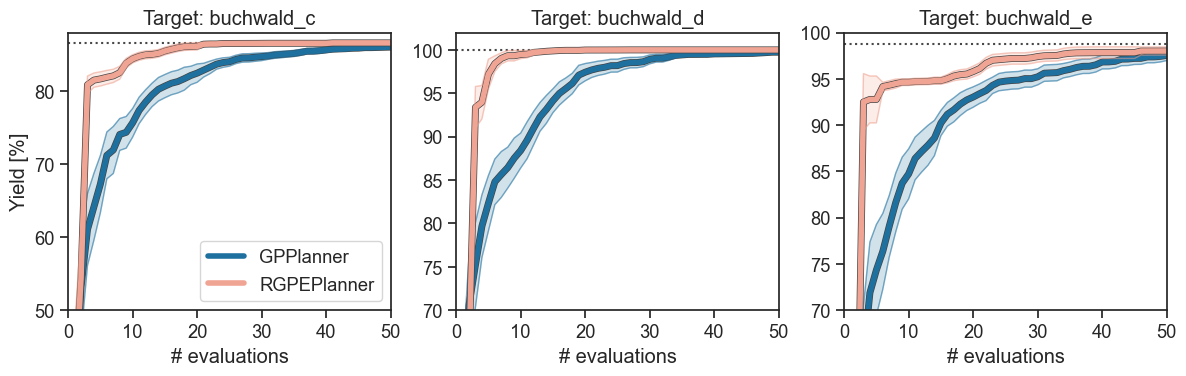

In [26]:
# subplots for paper
bo_color = '#1e709f'
rgpe_color = '#f0a594'

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

#----------
# TARGET C
#----------
plot_min_trace_mean(res_bo_c, color=bo_color, maximize=True, stde=True, unc=True, ax=axes[0], label='GPPlanner')
plot_min_trace_mean(res_rgpe_c, color=rgpe_color, maximize=True, stde=True, unc=True, ax=axes[0], label='RGPEPlanner')
axes[0].set_xlim(0, 50)
axes[0].set_ylim(50, 88)

axes[0].axhline(max_yield_c, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

axes[0].legend(loc='lower right')

axes[0].set_xlabel('# evaluations')
axes[0].set_ylabel('Yield [%]')

axes[0].set_title('Target: buchwald_c')


#----------
# TARGET D
#----------
plot_min_trace_mean(res_bo_d, color=bo_color, maximize=True, stde=True, unc=True, ax=axes[1], label='GPPlanner')
plot_min_trace_mean(res_rgpe_d, color=rgpe_color, maximize=True, stde=True, unc=True, ax=axes[1], label='RGPEPlanner')
axes[1].set_xlim(0, 50)
axes[1].set_ylim(70, 102)

axes[1].axhline(max_yield_d, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

axes[1].set_xlabel('# evaluations')

axes[1].set_title('Target: buchwald_d')

#----------
# TARGET E
#----------
plot_min_trace_mean(res_bo_e, color=bo_color, maximize=True, stde=True, unc=True, ax=axes[2], label='GPPlanner')
plot_min_trace_mean(res_rgpe_e, color=rgpe_color, maximize=True, stde=True, unc=True, ax=axes[2], label='RGPEPlanner')
axes[2].set_xlim(0, 50)
axes[2].set_ylim(70, 100)

axes[2].axhline(max_yield_e, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

axes[2].set_xlabel('# evaluations')
axes[2].set_title('Target: buchwald_e')

plt.tight_layout()
plt.savefig('meta_learning_buchwald_traces.png', dpi=300)

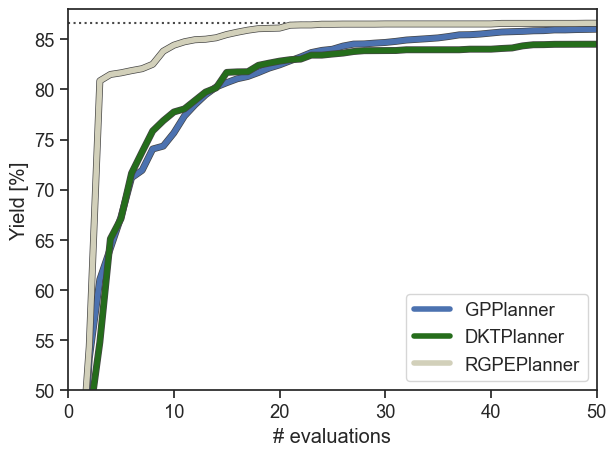

In [7]:
#----------
# TARGET C
#----------
fig, ax = plt.subplots()
plot_min_trace_mean(res_bo_c, color='b', maximize=True, unc=False, ax=ax, label='GPPlanner')
plot_min_trace_mean(res_dkt_c, color='#256D1B', maximize=True, unc=False, ax=ax, label='DKTPlanner')
plot_min_trace_mean(res_rgpe_c, color='#D2D0BA', maximize=True, unc=False, ax=ax, label='RGPEPlanner')
ax.set_xlim(0, 50)
ax.set_ylim(50, 88)

ax.axhline(max_yield_c, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

ax.legend(loc='lower right')

ax.set_xlabel('# evaluations')
ax.set_ylabel('Yield [%]')

plt.tight_layout()

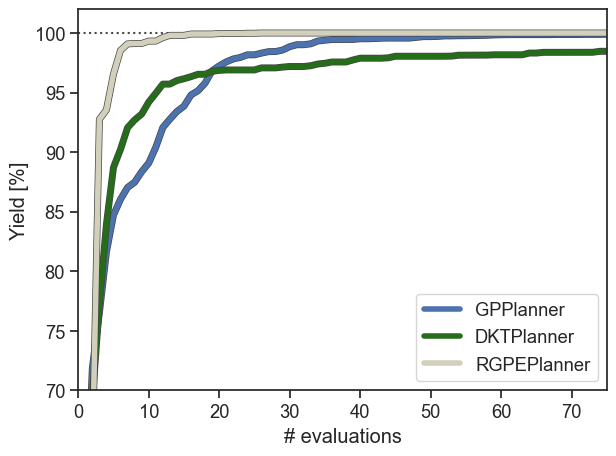

In [66]:
#----------
# TARGET D
#----------
fig, ax = plt.subplots()
plot_min_trace_mean(res_bo_d, color='b', maximize=True, unc=False, ax=ax, label='GPPlanner')
plot_min_trace_mean(res_dkt_d, color='#256D1B', maximize=True, unc=False, ax=ax, label='DKTPlanner')
plot_min_trace_mean(res_rgpe_d, color='#D2D0BA', maximize=True, unc=False, ax=ax, label='RGPEPlanner')
ax.set_xlim(0, 75)
ax.set_ylim(70, 102)

ax.axhline(max_yield_d, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

ax.legend(loc='lower right')

ax.set_xlabel('# evaluations')
ax.set_ylabel('Yield [%]')

plt.tight_layout()

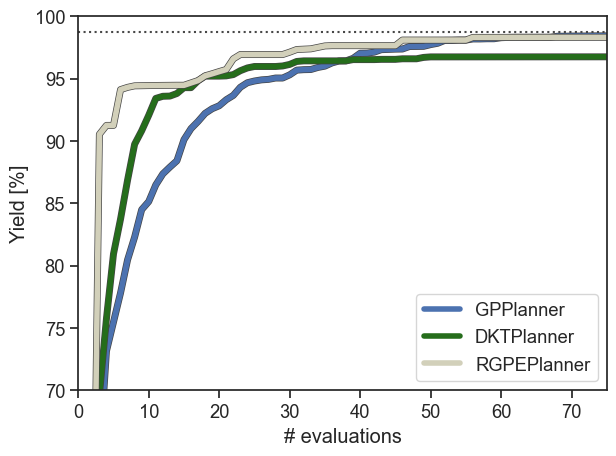

In [67]:
#----------
# TARGET E
#----------
fig, ax = plt.subplots()
plot_min_trace_mean(res_bo_e, color='b', maximize=True, unc=False, ax=ax, label='GPPlanner')
plot_min_trace_mean(res_dkt_e, color='#256D1B', maximize=True, unc=False, ax=ax, label='DKTPlanner')
plot_min_trace_mean(res_rgpe_e, color='#D2D0BA', maximize=True, unc=False, ax=ax, label='RGPEPlanner')
ax.set_xlim(0, 75)
ax.set_ylim(70, 100)

ax.axhline(max_yield_e, c='k', ls=':', lw=1.5, alpha=0.8, zorder=1)

ax.legend(loc='lower right')

ax.set_xlabel('# evaluations')
ax.set_ylabel('Yield [%]')

plt.tight_layout()